#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Matplotlib is building the font cache; this may take a moment.


### Import the CSV dataset as pandas DF


In [4]:
df = pd.read_csv("data/stud.csv")

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

### 2.2 Dataset information
- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

### 3. Data checks to perform
Check missing values

Check Duplicates

Check data types


Check the number of unique values of each columns

Check the statistics of data set

Check the various categories present in the different cat. columns

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

gender                         object
race_ethnicity                 object
parental_level_of_education    object
lunch                          object
test_preparation_course        object
math_score                      int64
reading_score                   int64
writing_score                   int64
dtype: object

In [10]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [11]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

In [12]:
e = df["gender"].nunique()
print(f"Categories in Gender column : {e}", end=" ")
print(df["gender"].unique())

e = df["lunch"].nunique()
print(f"Categories in lunch column : {e}", end=" ")
print(df["lunch"].unique())

e = df["parental_level_of_education"].nunique()
print(f"Categories in parental_level_of_education column : {e}", end=" ")
print(df["parental_level_of_education"].unique())

e = df["race_ethnicity"].nunique()
print(f"Categories in race_ethnicity column : {e}", end=" ")
print(df["race_ethnicity"].unique())

e = df["test_preparation_course"].nunique()
print(f"Categories in test_preparation_course column : {e}", end=" ")
print(df["test_preparation_course"].unique())


Categories in Gender column : 2 ['female' 'male']
Categories in lunch column : 2 ['standard' 'free/reduced']
Categories in parental_level_of_education column : 6 ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in race_ethnicity column : 5 ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in test_preparation_course column : 2 ['none' 'completed']


In [13]:
#Define Numerical and Categorical columns

num_col=[feature for feature in df.columns if df[feature].dtype !='O']
cat_col=[feature for feature in df.columns if df[feature].dtype == 'O']

print("We have {} numerical features : {}".format(len(num_col),num_col))
print("We have {} Categorical features : {}".format(len(cat_col),cat_col))

We have 3 numerical features : ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [14]:
df["Total_score"] = df["math_score"] + df["reading_score"] + df["writing_score"]
df["AVG"] = df["Total_score"]/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,AVG
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [15]:
reading_full = df[df['reading_score'] == 100]['AVG'].count()
writing_full = df[df['writing_score'] == 100]['AVG'].count()
math_full = df[df['math_score'] == 100]['AVG'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [16]:
reading_full = df[df['reading_score'] <= 20]['AVG'].count()
writing_full = df[df['writing_score'] <= 20]['AVG'].count()
math_full = df[df['math_score'] <= 20]['AVG'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 4
Number of students with full marks in Writing: 3
Number of students with full marks in Reading: 1


### From this above analysis, we get to know that students have performed bad in Maths, and best in Reading subject

### Exploratory Data analysis (Visualisation)

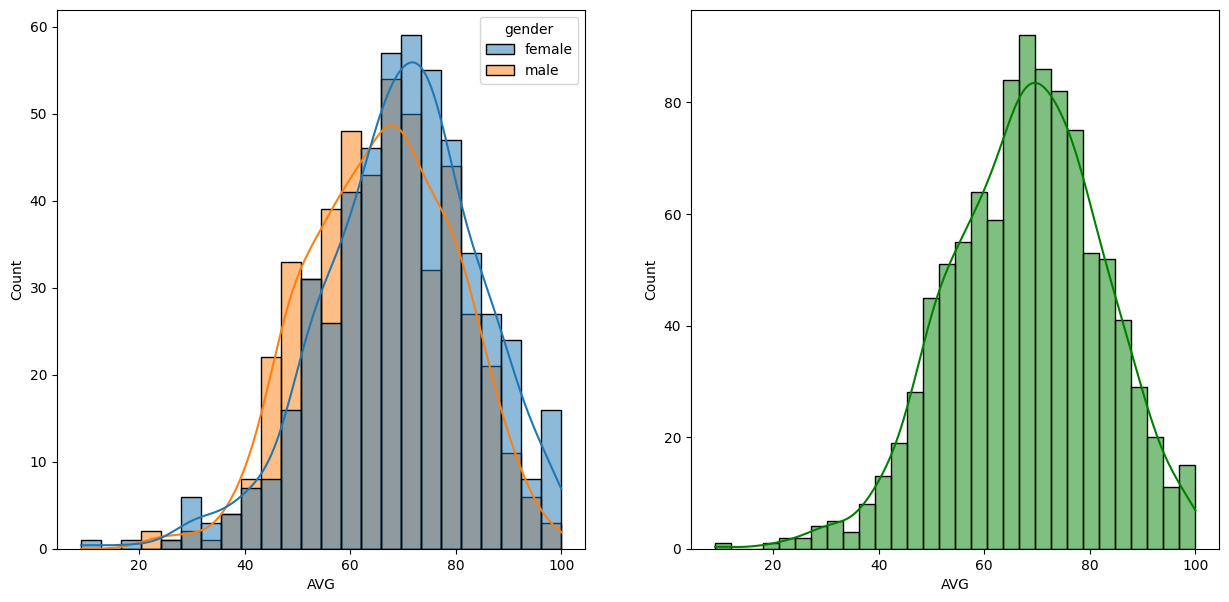

In [45]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(122)
sns.histplot(data=df, x="AVG", bins=30, kde=True, color='g')
plt.subplot(121)
sns.histplot(data=df, x="AVG",kde=True,hue="gender")
plt.show()

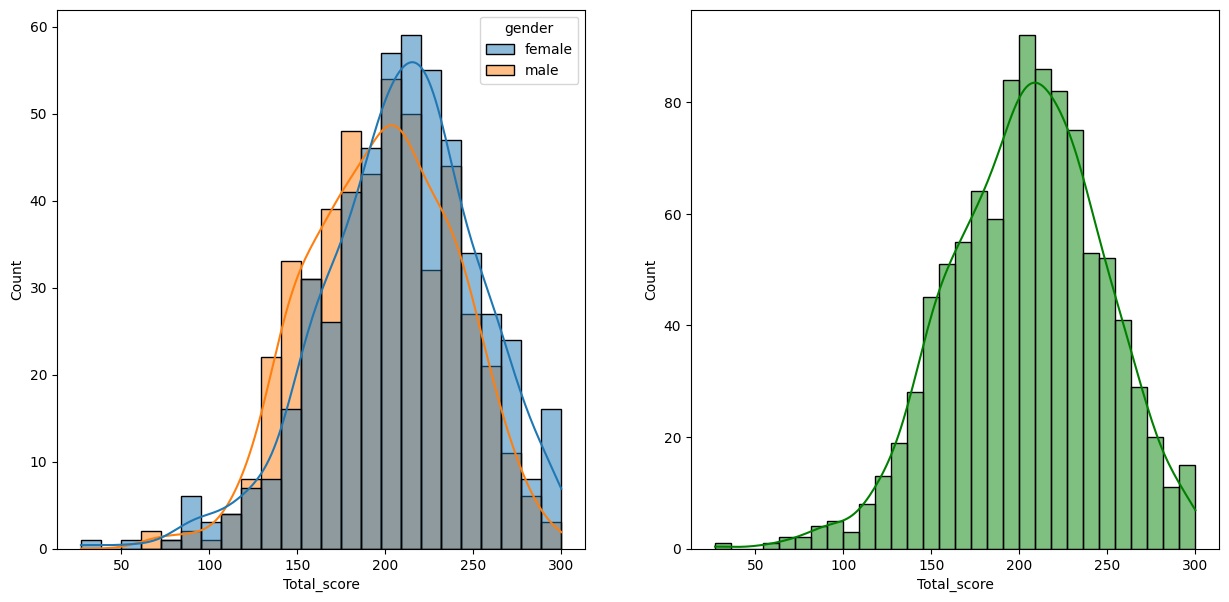

In [46]:
fig, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(122)
sns.histplot(data=df, x="Total_score", bins=30, kde=True, color='g')
plt.subplot(121)
sns.histplot(data=df, x="Total_score",kde=True,hue="gender")
plt.show()

<Axes: xlabel='AVG', ylabel='Count'>

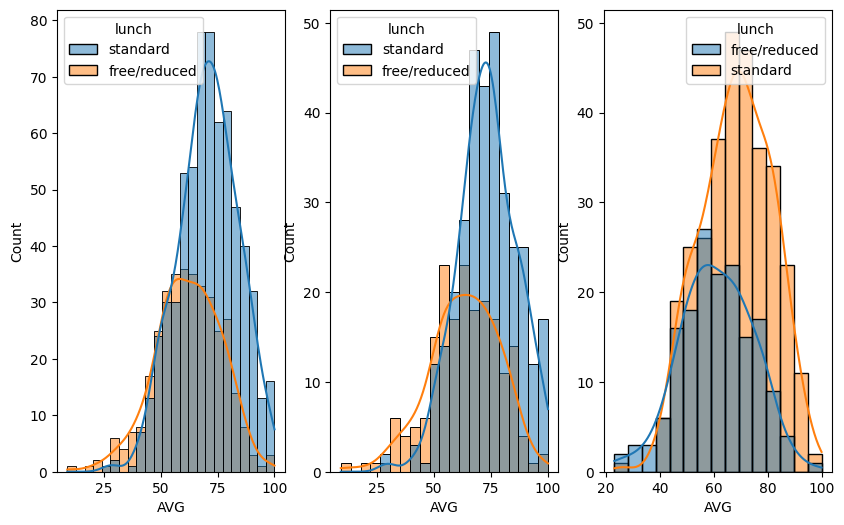

In [57]:
plt.subplots(1,3,figsize=(10,6))
plt.subplot(131)
sns.histplot(data=df,x="AVG",kde=True,hue="lunch")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="AVG",kde=True,hue="lunch")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="AVG",kde=True,hue="lunch")

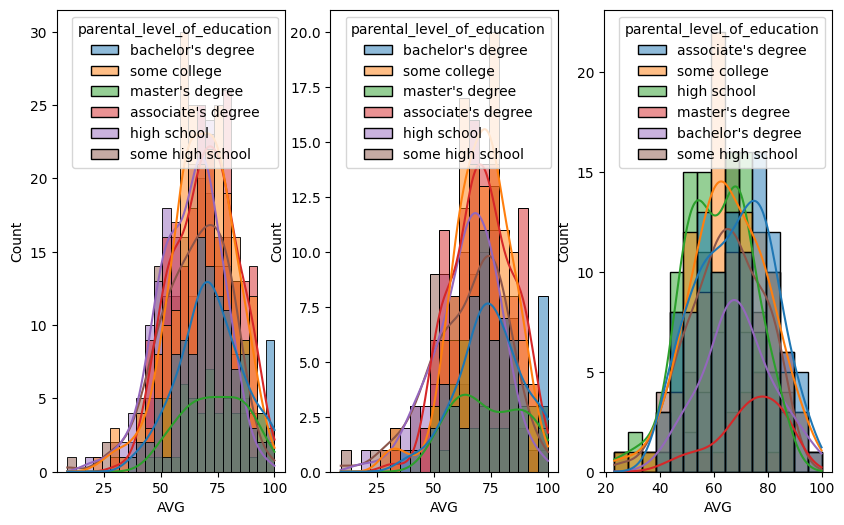

In [60]:
plt.subplots(1,3,figsize=(10,6))
plt.subplot(131)
sns.histplot(data=df,x="AVG",kde=True,hue="parental_level_of_education")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="AVG",kde=True,hue="parental_level_of_education")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="AVG",kde=True,hue="parental_level_of_education")
plt.show()

In [61]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'AVG'],
      dtype='object')

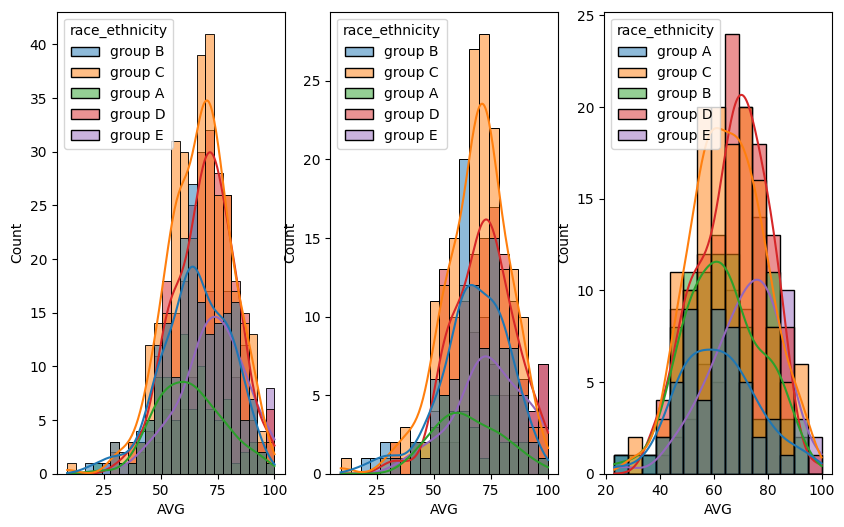

In [62]:
plt.subplots(1,3,figsize=(10,6))
plt.subplot(131)
sns.histplot(data=df,x="AVG",kde=True,hue="race_ethnicity")
plt.subplot(132)
sns.histplot(data=df[df.gender=="female"],x="AVG",kde=True,hue="race_ethnicity")
plt.subplot(133)
sns.histplot(data=df[df.gender=="male"],x="AVG",kde=True,hue="race_ethnicity")
plt.show()

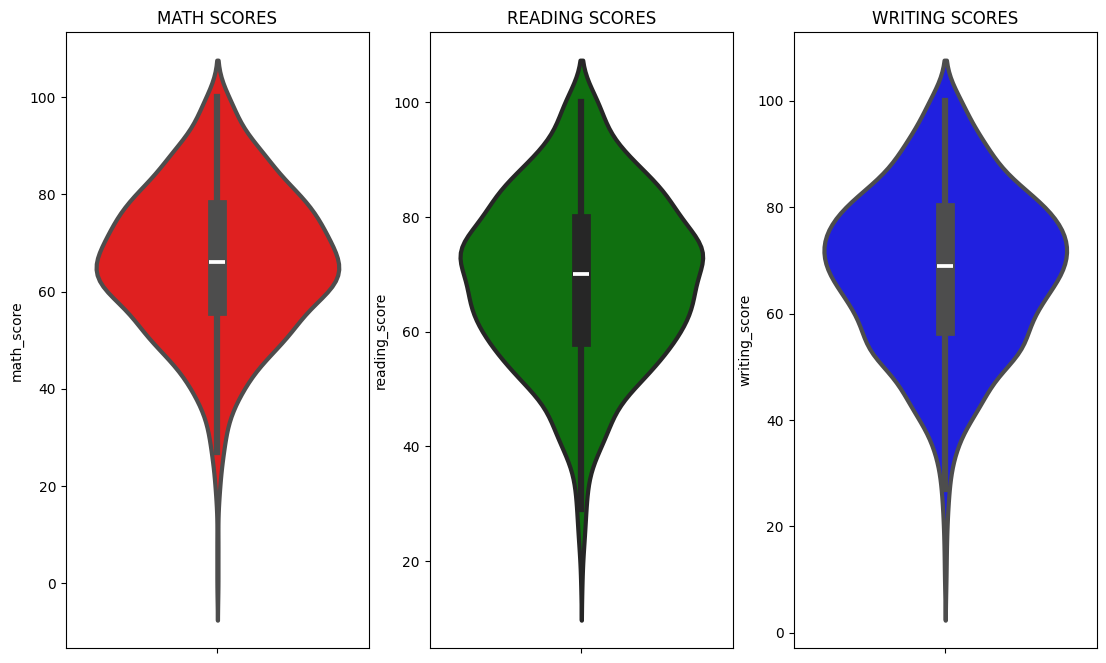

In [63]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Multivariant analysis using pieplot


(-1.25, 1.25, -1.25, 1.25)

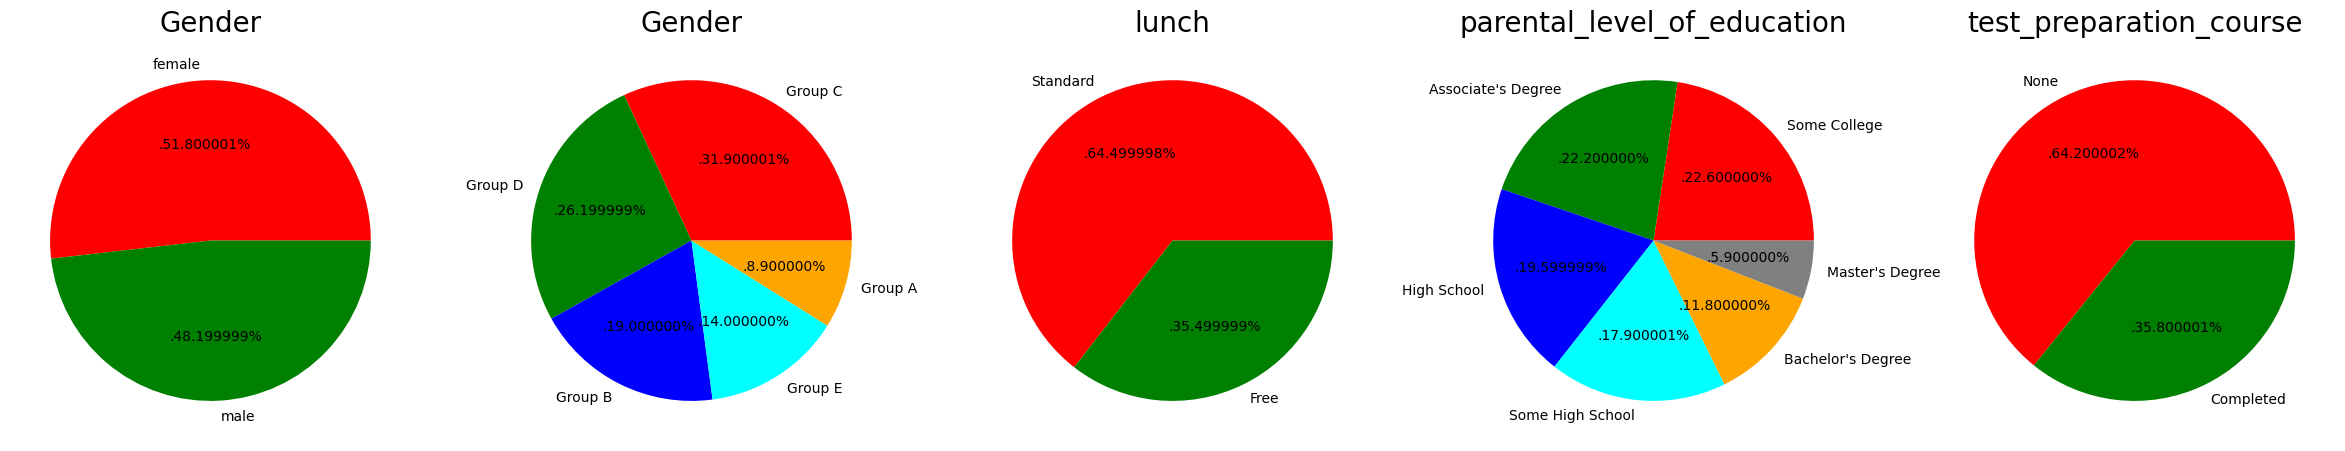

In [67]:
plt.rcParams["figure.figsize"] = (30,12)

plt.subplot(1,5,1)
size= df["gender"].value_counts()
labels='female','male'
color = ['red','green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels= 'Group C', 'Group D','Group B','Group E','Group A'
color=['red', 'green', 'blue', 'cyan','orange']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['lunch'].value_counts()
labels=  'Standard', 'Free'
color=['red', 'green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('lunch', fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['parental_level_of_education'].value_counts()
labels= 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color=['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('parental_level_of_education', fontsize=20)
plt.axis('off')

plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels= 'None', 'Completed'
color=['red', 'green']

plt.pie(size,colors=color,labels=labels,autopct='.%2f%%')
plt.title('test_preparation_course', fontsize=20)
plt.axis('off')

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### Feature wise visualisation

### 1.Gender

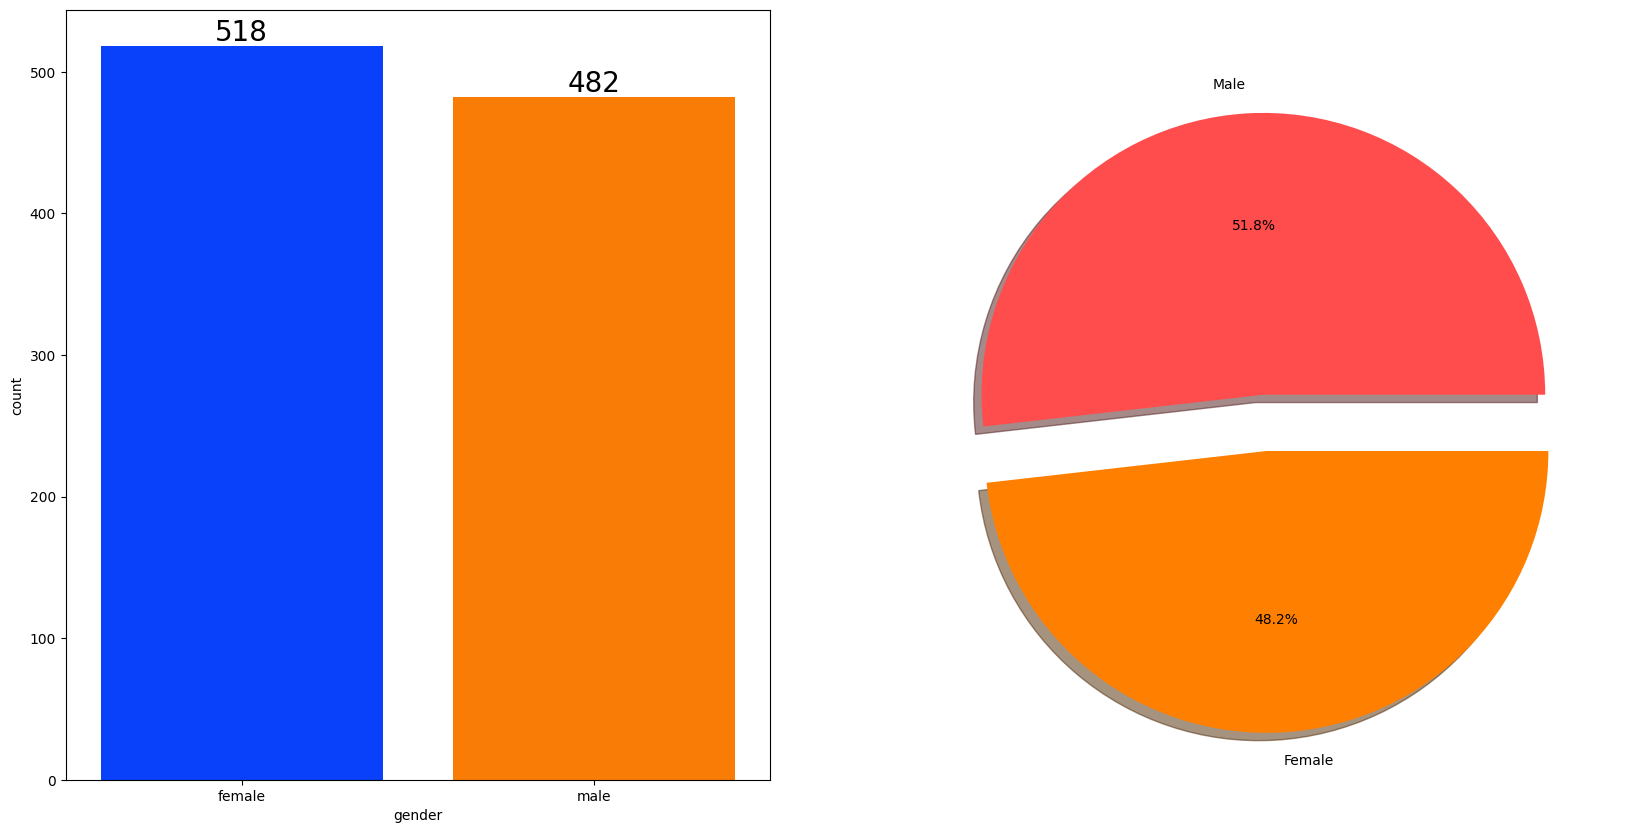

In [71]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df["gender"],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df["gender"].value_counts(),labels=['Male','Female'],
        explode=[0,0.2],autopct='%1.1f%%',shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show()

In [74]:
gender_group = df.groupby("gender").nunique()
gender_group

,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,AVG
gender,,,,,,,,,
female,5,6,2,2,79,67,69,168,168
male,5,6,2,2,68,65,67,158,158


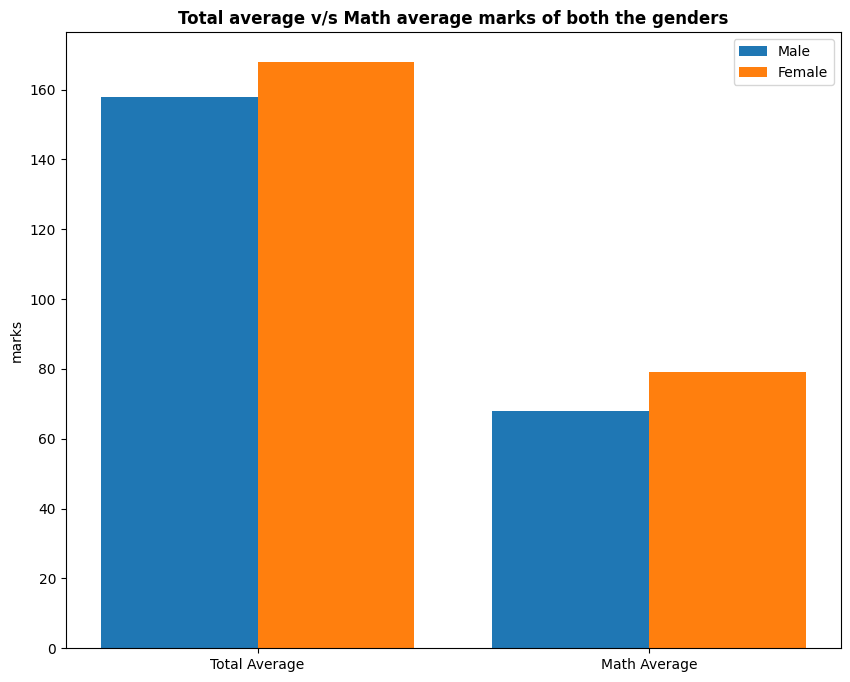

In [77]:
plt.figure(figsize=(10,8))

x=['Total Average','Math Average']

female_scores=[gender_group['AVG'][0], gender_group['math_score'][0]]
male_scores=[gender_group['AVG'][1], gender_group['math_score'][1]]

X_axis=np.arange(len(x))

plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')

plt.xticks(X_axis,x)
plt.ylabel("marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()


### 2. Race\ethnicity column

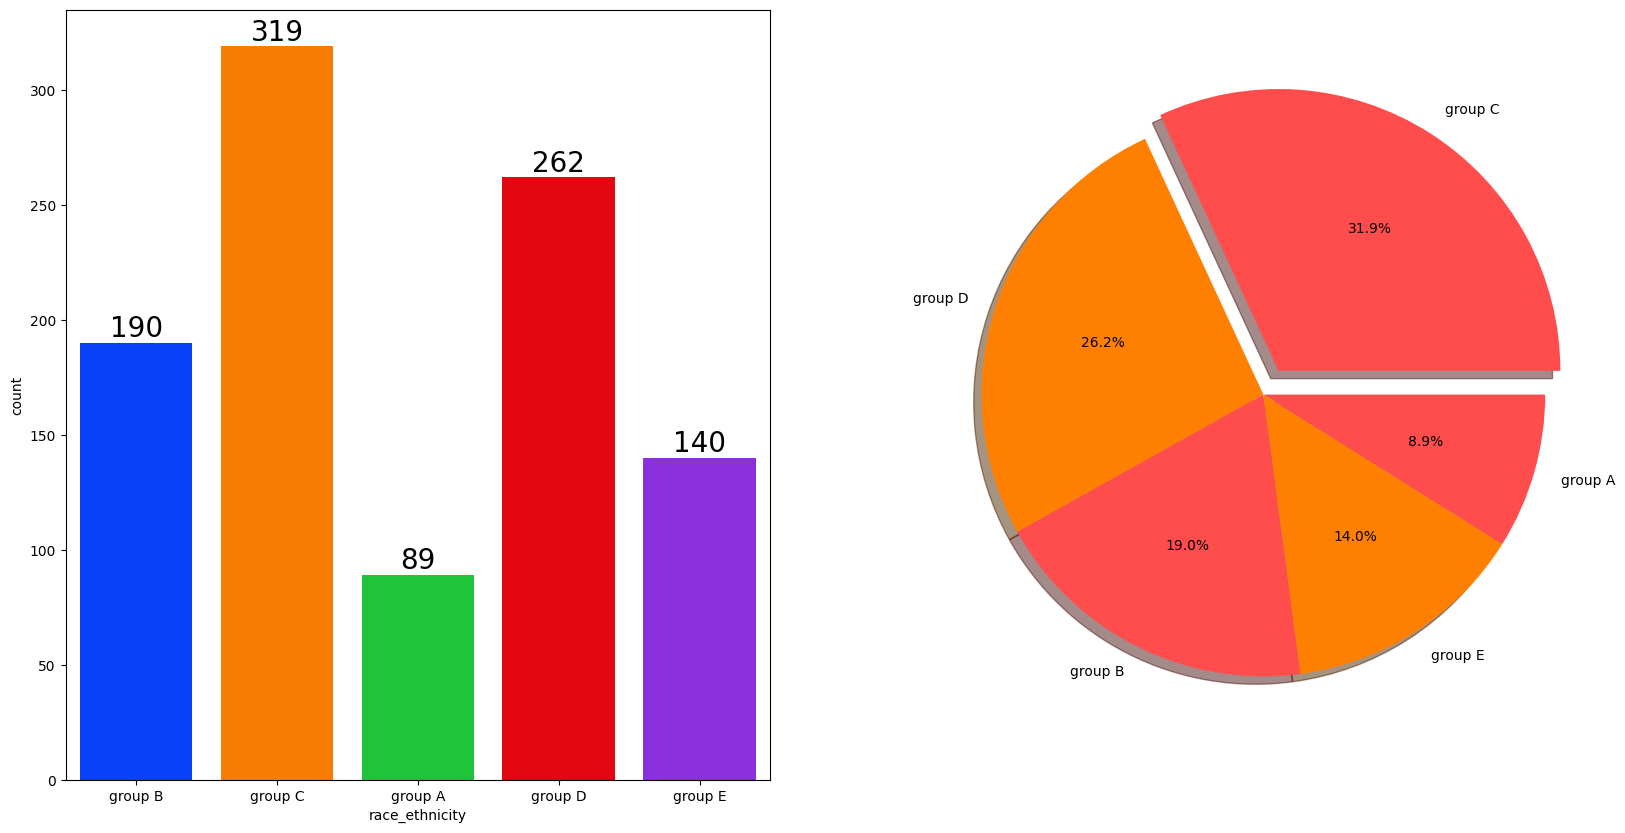

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df["race_ethnicity"],data=df,palette='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=df["race_ethnicity"].value_counts(),labels=df['race_ethnicity'].value_counts().index,
        explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True,
        colors=['#ff4d4d','#ff8000'])
plt.show()

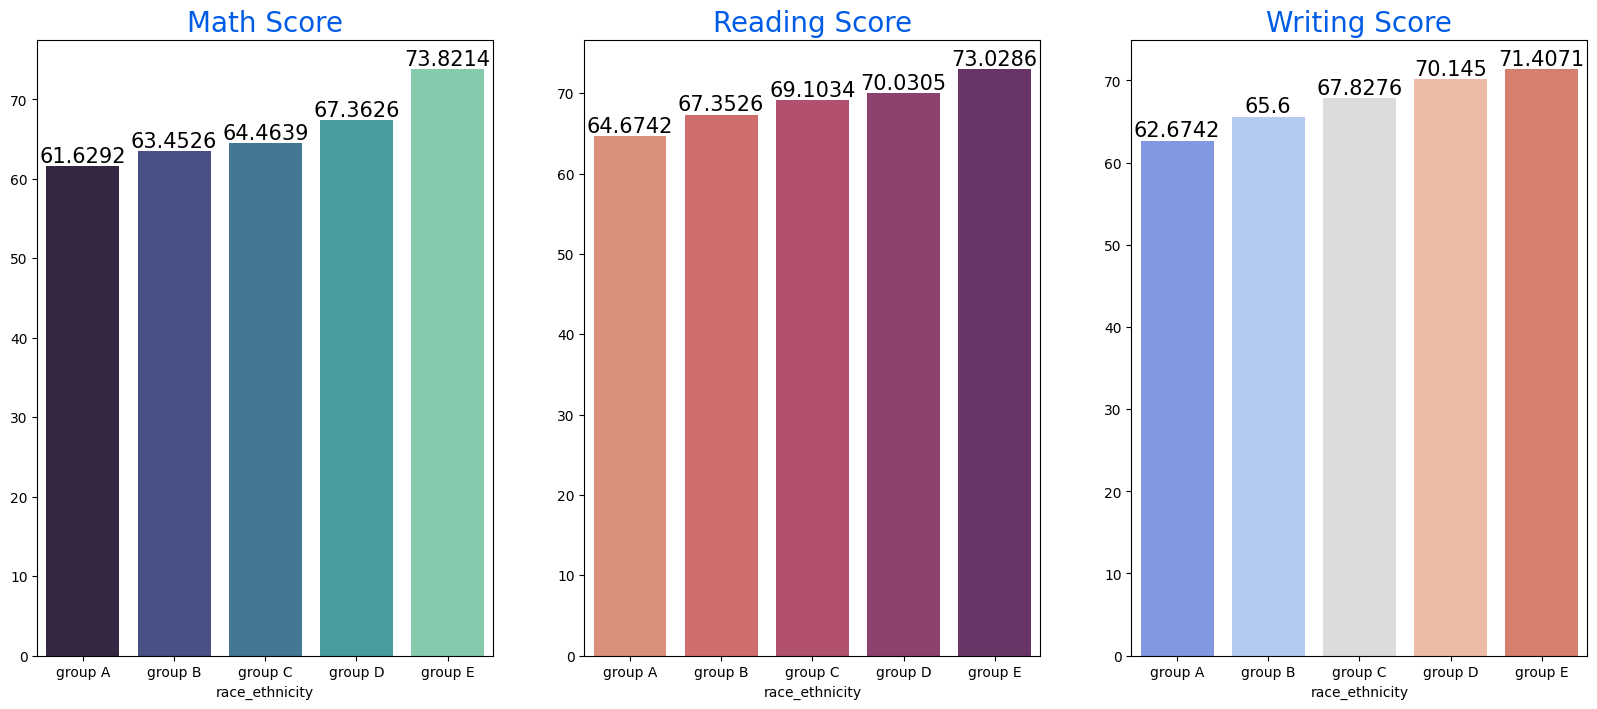

In [85]:
df2 = df.groupby("race_ethnicity")
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=df2["math_score"].mean().index, y=df2["math_score"].mean().values,palette='mako',ax=ax[0])
ax[0].set_title("Math Score", color='#005ce6',size=20)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=df2["reading_score"].mean().index, y=df2["reading_score"].mean().values,palette='flare',ax=ax[1])
ax[1].set_title("Reading Score", color='#005ce6',size=20)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=df2["writing_score"].mean().index, y=df2["writing_score"].mean().values,palette='coolwarm',ax=ax[2])
ax[2].set_title("Writing Score", color='#005ce6',size=20)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### 3. Parental level of education

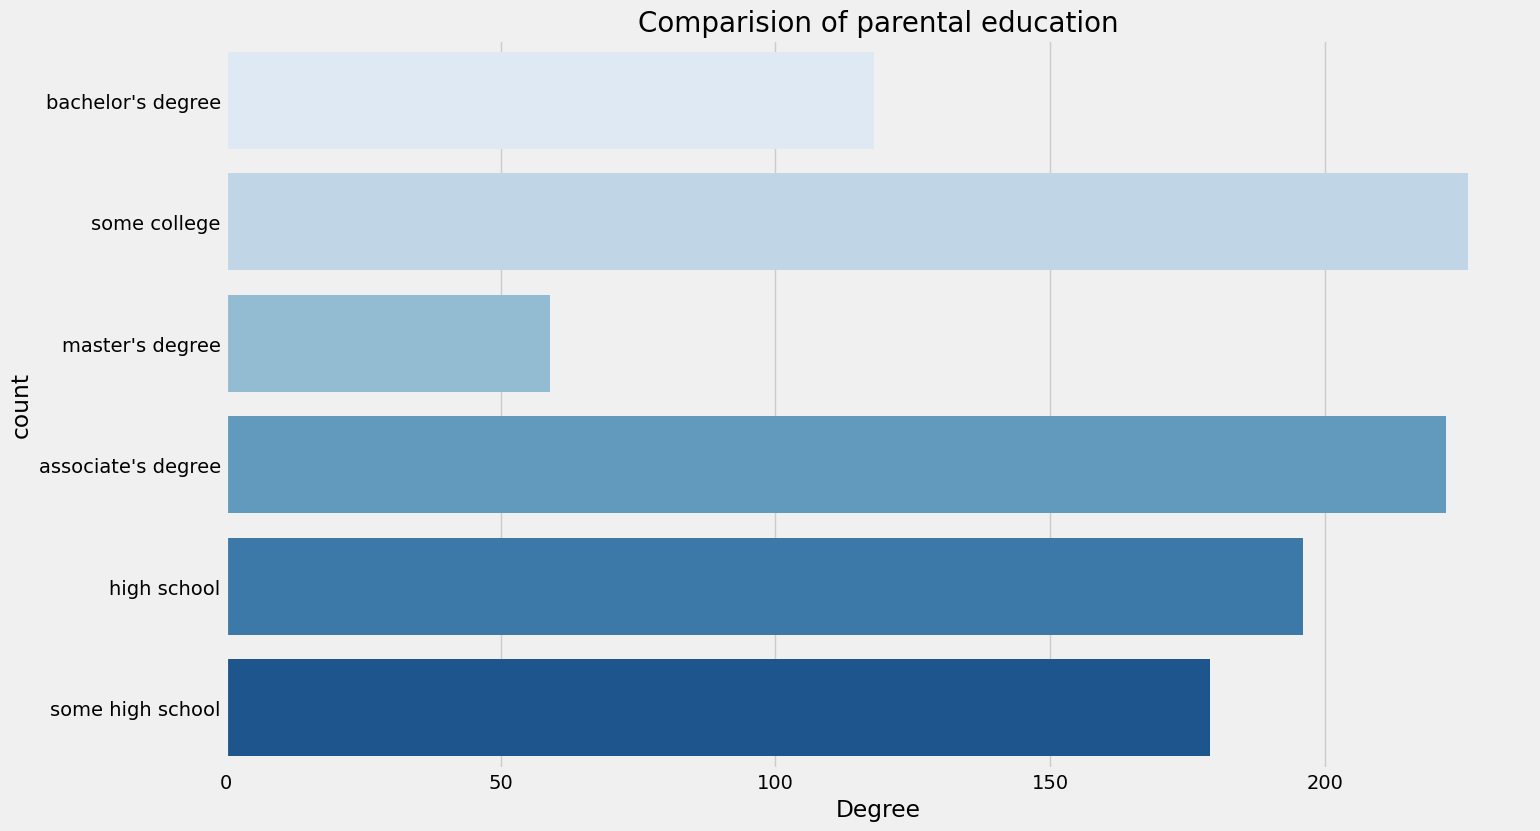

In [87]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df["parental_level_of_education"],palette= 'Blues')
plt.title('Comparision of parental education', fontweight=30, fontsize=20)
plt.xlabel("Degree")
plt.ylabel("count")
plt.show()

In [114]:
lis= [col for col in df.columns if df[col].dtype != 'O'] + ["parental_level_of_education"]
print(lis)


['math_score', 'reading_score', 'writing_score', 'Total_score', 'AVG', 'parental_level_of_education']


In [118]:
del lis[lis.index("Total_score")]


In [119]:
df3=df[lis]
df3

,math_score,reading_score,writing_score,AVG,parental_level_of_education
0,72,72,74,72.666667,bachelor's degree
1,69,90,88,82.333333,some college
2,90,95,93,92.666667,master's degree
3,47,57,44,49.333333,associate's degree
4,76,78,75,76.333333,some college
...,...,...,...,...,...
995,88,99,95,94.000000,master's degree
996,62,55,55,57.333333,high school
997,59,71,65,65.000000,high school
998,68,78,77,74.333333,some college


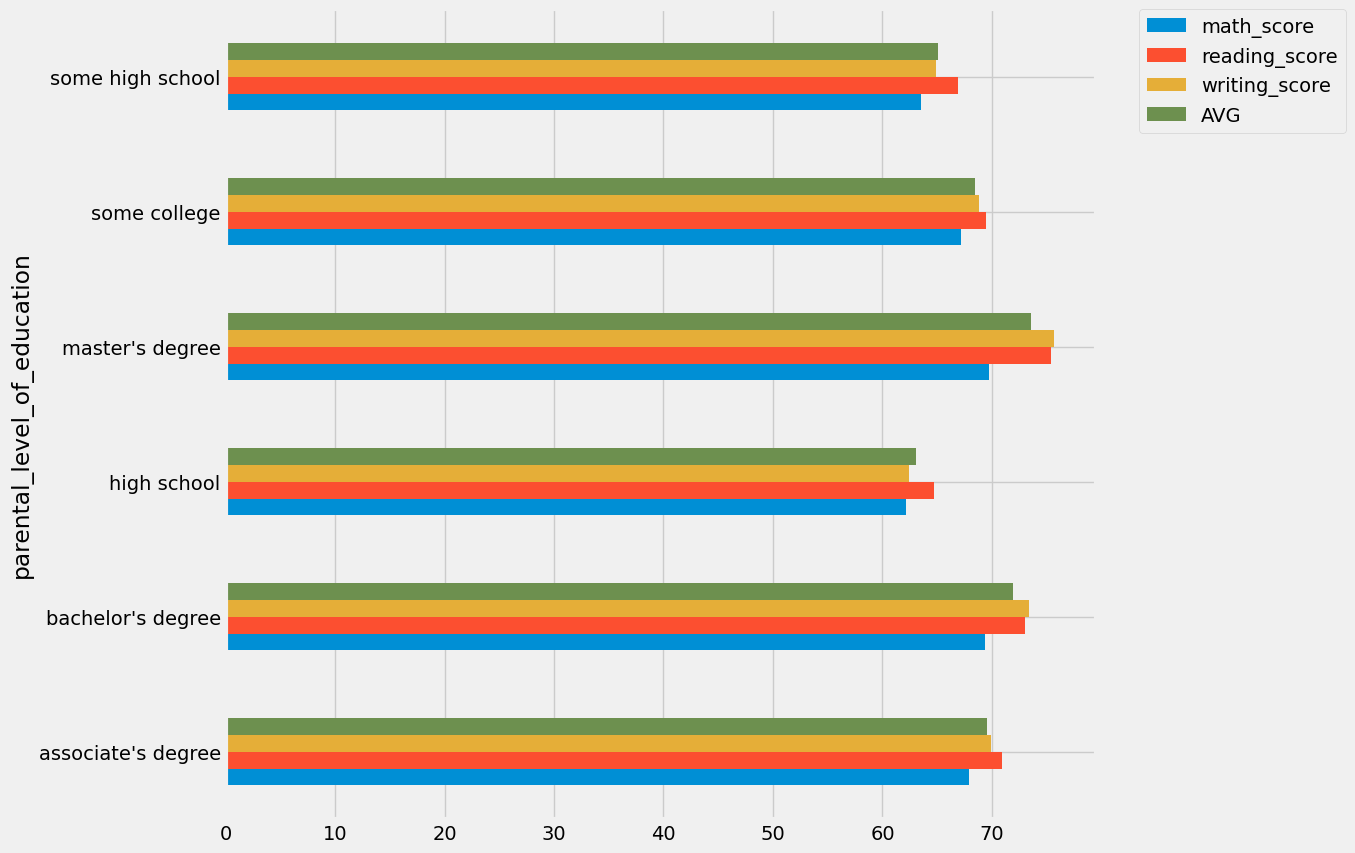

In [120]:
df3.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### 4.Lunch

In [122]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

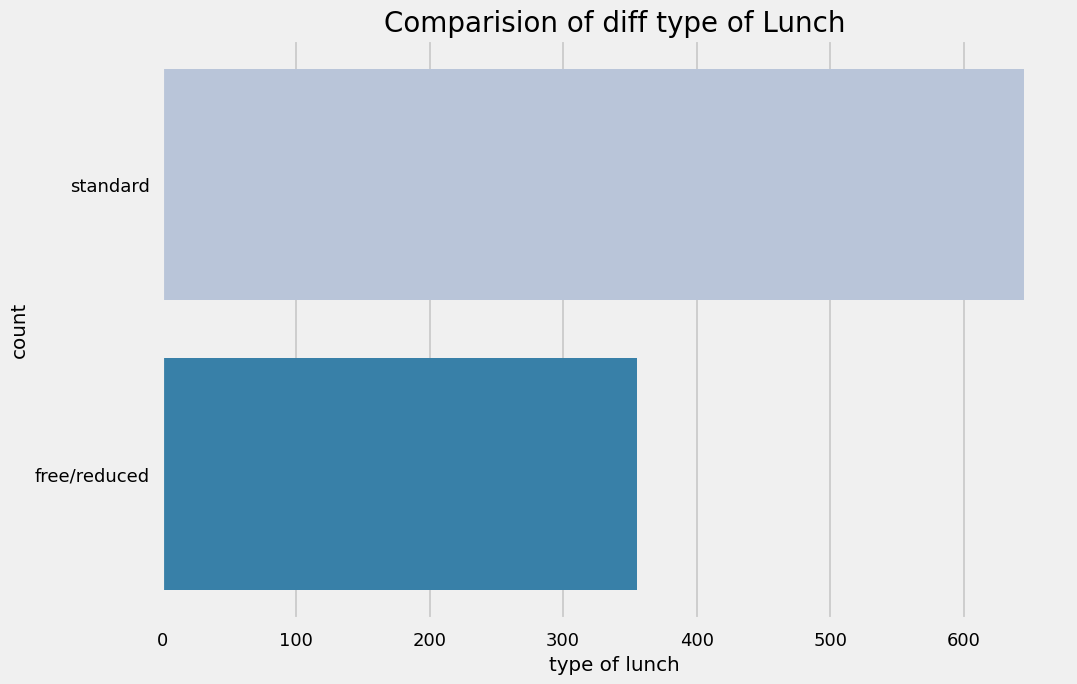

In [123]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df["lunch"],palette= 'PuBu')
plt.title('Comparision of diff type of Lunch', fontweight = 30, fontsize = 20)
plt.xlabel('type of lunch')
plt.ylabel('count')
plt.show()

In [124]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score', 'Total_score', 'AVG'],
      dtype='object')

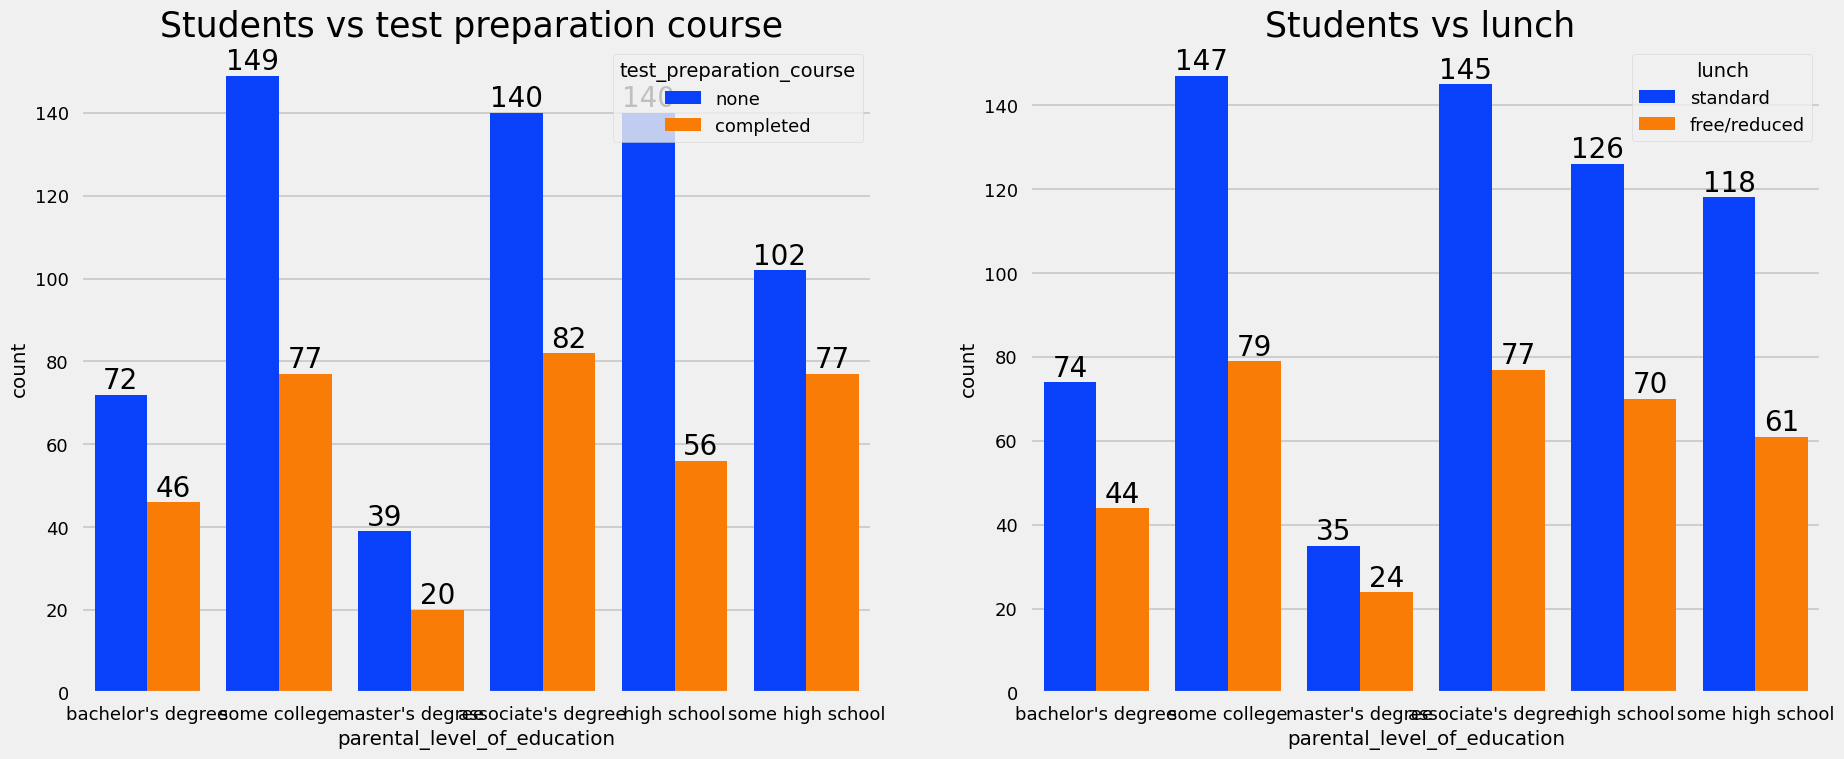

In [128]:
f,ax = plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df["parental_level_of_education"], data=df, palette='bright', hue='test_preparation_course',
              saturation=0.95, ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df["parental_level_of_education"], data=df, palette='bright', hue='lunch',
              saturation=0.95, ax=ax[1])
ax[1].set_title('Students vs lunch ',color='black',size=25)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

### 5. Test prepartion course

<Axes: xlabel='lunch', ylabel='writing_score'>

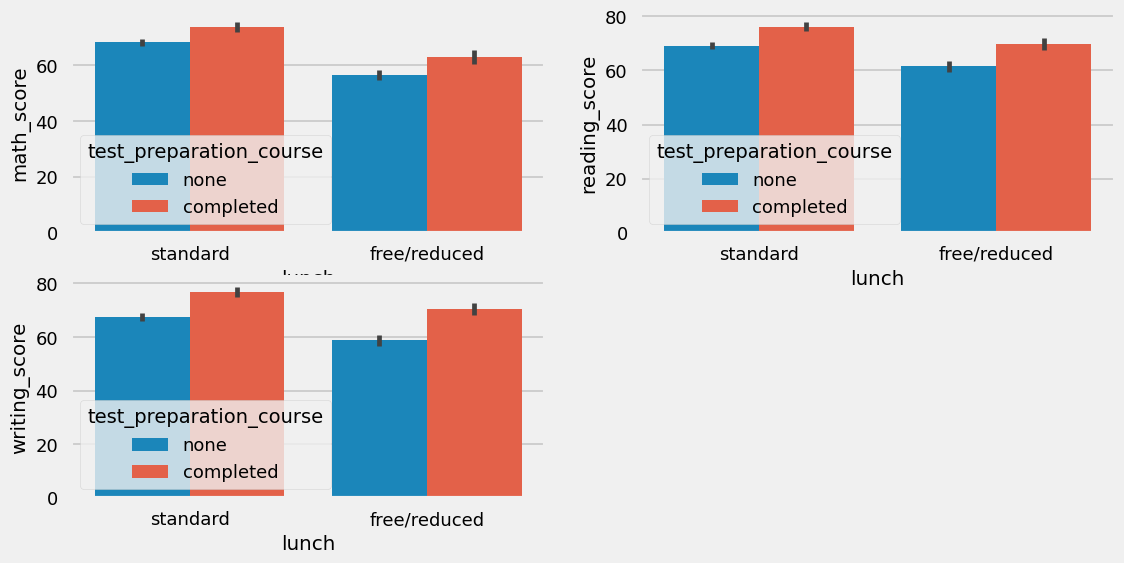

In [130]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df["lunch"], y=df["math_score"], hue =df["test_preparation_course"])
plt.subplot(2,2,2)
sns.barplot(x=df["lunch"], y=df["reading_score"], hue =df["test_preparation_course"])
plt.subplot(2,2,3)
sns.barplot(x=df["lunch"], y=df["writing_score"], hue =df["test_preparation_course"])

### 6. Checking outliers

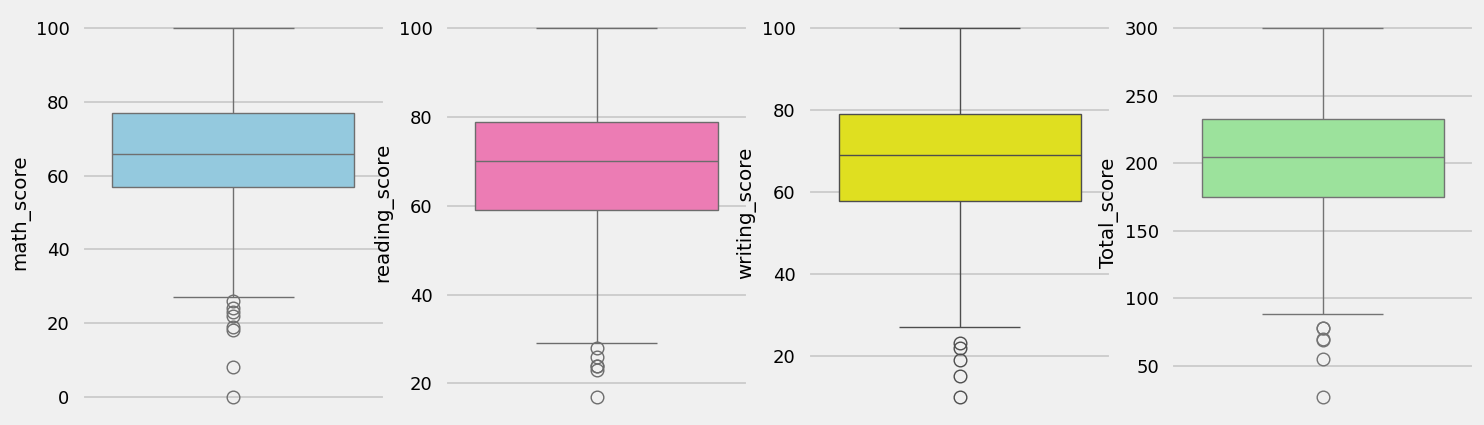

In [132]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df["math_score"],color='skyblue')
plt.subplot(142)
sns.boxplot(df["reading_score"],color='hotpink')
plt.subplot(143)
sns.boxplot(df["writing_score"],color='yellow')
plt.subplot(144)
sns.boxplot(df["Total_score"],color='lightgreen')
plt.show()

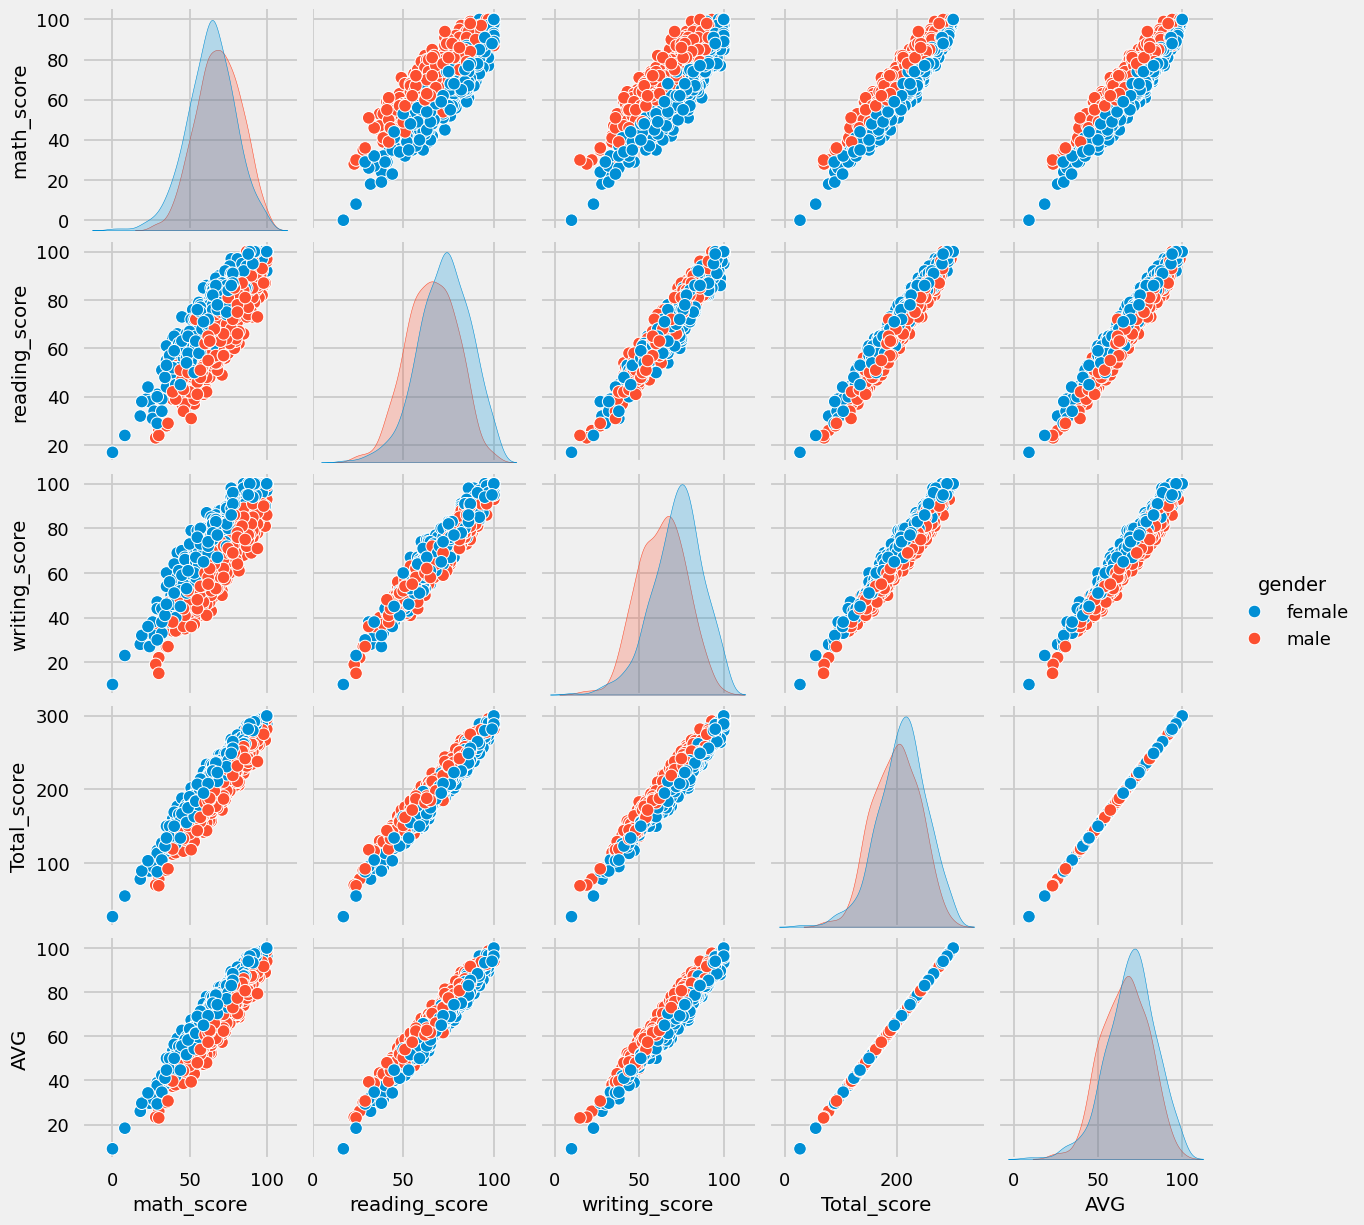

In [133]:
sns.pairplot(df,hue="gender")
plt.show()

#### Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.